In [2]:
#!pip install datasets

In [7]:
import gensim.downloader

In [8]:
import numpy as np
import seaborn as sns
import pandas as pd

In [31]:
#Get Word2Vec Embeddings
w2v = gensim.downloader.load('word2vec-google-news-300')

In [7]:
#Dictionary containing word as key and their index in w2v as value
key_dict = w2v.key_to_index

In [8]:
#List of the words in the same order as w2v
words = list(key_dict.keys())

In [9]:
key_dict['football']

723

In [10]:
words[723]

'football'

## Task 1 Word Vector Visualisation

In [19]:
#Insert the embeddings of the first 10000 words from w2v into vec_list
#your code here
vec_list = [
    w2v[i] for i in range(10000)
]

In [20]:
vec_array = np.array(vec_list)

In [21]:
vec_array.shape

(10000, 300)

In [22]:
from sklearn.manifold import TSNE

In [23]:
#Use TSNE to reduce the dimension of vectors in vec_array from 300 to 2 and produce a reduced vector matrix. Print its shape for checking.
#your code here
X_embedded = TSNE(
  n_components=2,
  learning_rate='auto',
  init='random',
  perplexity=3
).fit_transform(vec_array)

In [24]:
X_embedded.shape

(10000, 2)

In [25]:
#Lists for plotting them on graph
labels = []
dim1 = []
dim2 = []

In [31]:
#Put the words in list ['football','tennis','hockey','baseball','field','court','law','science','literature','computer','games'] in labels.
#Put the first dimension from the reduced vectors corresponding to the words in dim1 list
#Put the second dimension from the reduced vectors corresponding to the words in dim2 list
#your code here
for word in ['football','tennis','hockey','baseball','field','court','law','science','literature','computer','games']:
    labels.append(word)
    dim1.append(X_embedded[key_dict[word]][0])
    dim2.append(X_embedded[key_dict[word]][1])

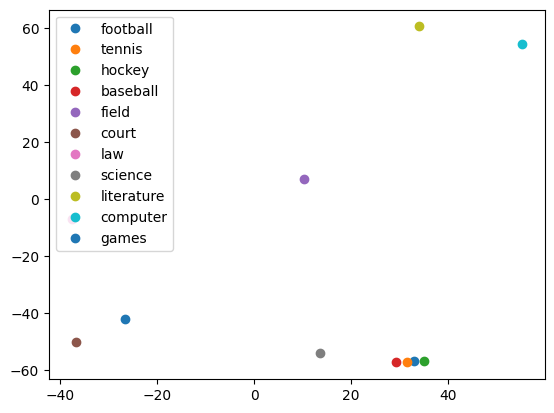

In [32]:
import matplotlib.pyplot as plt
for i in range(len(labels)):
  plt.plot(dim1[i],dim2[i],'o',label=labels[i])

plt.legend(loc="upper left")
plt.show()

## Task 2.1 Simple Bias Analysis

In [40]:
#Use the most_similar function in w2v to print words most similar to "job" and "men" and most dissimilar to "women"
#your code here
print(w2v.most_similar('job'))
print(w2v.most_similar('men'))
TODO print(w2v.most_similar('women'))

[('jobs', 0.6262935996055603), ('Job', 0.567025899887085), ('BrokeAss_Blog_Need', 0.5589309930801392), ('work', 0.5102996826171875), ('daunting_Platoni', 0.5058081150054932), ('employment', 0.49385011196136475), ('monster.com', 0.4883536100387573), ('thankless_job', 0.460772842168808), ('rsum', 0.45291033387184143), ('temping', 0.4513639807701111)]
[('women', 0.767493724822998), ('Men', 0.6301247477531433), ('males', 0.6242231130599976), ('mens', 0.5807526707649231), ('boys', 0.5781347751617432), ('man', 0.5489763021469116), ('females', 0.5481874346733093), ('teenagers', 0.5462744832038879), ('girls', 0.540932834148407), ('ladies', 0.5234237909317017)]
[('Men', 0.5693342089653015), ('transwomen', 0.5697940587997437), ('husbands', 0.5705342292785645), ('ladies', 0.5865179300308228), ('mothers', 0.6050933599472046), ('females', 0.6240420341491699), ('girls', 0.6339040398597717), ('womens', 0.6786180734634399), ('Women', 0.7283449769020081), ('men', 0.767493724822998)]


In [ ]:
#Use the most_similar function in w2v to print words most similar to "job" and "women" and most dissimilar to "men"
#your code here
print(w2v.most_similar('job'))
print(w2v.most_similar('women'))
TODO print(w2v.most_similar('men'))

## Task 2.2 Bias Analysis in models trained with word2vec embeddings

In [2]:
#Get SemEval 2018 Train data
!wget http://saifmohammad.com/WebDocs/AIT-2018/AIT2018-DATA/V-reg/English/2018-Valence-reg-En-train.zip



7[Files: 0  Bytes: 0  [0 B/s] Re]87[http://saifmohammad.com/WebDoc]872018-Valence-reg-En-  21% [=====>                        ]   12.89K    --.-KB/s872018-Valence-reg-En-  63% [==================>           ]   39.22K  210.62KB/s872018-Valence-reg-En- 100% [=============================>]   61.34K  205.28KB/s87[Files: 1  Bytes: 61.34K [100.2]8

In [3]:
#Get SemEval 2018 Test Data
!wget http://saifmohammad.com/WebDocs/SemEval2018-Task1-AIT-Test-gold.zip



7[Files: 0  Bytes: 0  [0 B/s] Re]87[http://saifmohammad.com/WebDoc]87SemEval2018-Task1-AI   0% [>                             ]   12.89K    --.-KB/s87SemEval2018-Task1-AI   1% [>                             ]   39.22K  104.89KB/s87SemEval2018-Task1-AI   3% [>                             ]   77.97K  173.08KB/s87SemEval2018-Task1-AI   5% [>                             ]  132.83K  238.45KB/s87SemEval2018-Task1-AI   5% [>                             ]  134.15K  192.78KB/s87SemEval2018-Task1-AI  11% [==>                           ]  264.32K  333.46KB/s87SemEval2018-Task1-AI  13% [===>                          ]  307.76K  335.46KB/s87SemEval2018-Task1-AI  18% [====>                         ]  411.76K  397.28KB/s87SemEval2018-Task1-AI  24% [======>                       ]  552.62K  478.05KB/s87SemEval2018-Task1-AI  24% [======>                       ]  556.56K  433.55KB/s87SemEval2018-Task1-AI  29% [=======>                      ]  660.56K  469.66KB/s87SemEval2018

In [4]:
!unzip 2018-Valence-reg-En-train.zip

Archive:  2018-Valence-reg-En-train.zip
  inflating: 2018-Valence-reg-En-train.txt  


In [5]:
!unzip SemEval2018-Task1-AIT-Test-gold.zip

Archive:  SemEval2018-Task1-AIT-Test-gold.zip
   creating: SemEval2018-Task1-AIT-Test-gold/
  inflating: SemEval2018-Task1-AIT-Test-gold/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/SemEval2018-Task1-AIT-Test-gold/
  inflating: __MACOSX/SemEval2018-Task1-AIT-Test-gold/._.DS_Store  
   creating: SemEval2018-Task1-AIT-Test-gold/E-c/
  inflating: SemEval2018-Task1-AIT-Test-gold/E-c/2018-E-c-Ar-test-gold.txt  
   creating: __MACOSX/SemEval2018-Task1-AIT-Test-gold/E-c/
  inflating: __MACOSX/SemEval2018-Task1-AIT-Test-gold/E-c/._2018-E-c-Ar-test-gold.txt  
  inflating: SemEval2018-Task1-AIT-Test-gold/E-c/2018-E-c-En-test-gold.txt  
  inflating: __MACOSX/SemEval2018-Task1-AIT-Test-gold/E-c/._2018-E-c-En-test-gold.txt  
  inflating: SemEval2018-Task1-AIT-Test-gold/E-c/2018-E-c-Es-test-gold.txt  
  inflating: __MACOSX/SemEval2018-Task1-AIT-Test-gold/E-c/._2018-E-c-Es-test-gold.txt  
   creating: SemEval2018-Task1-AIT-Test-gold/EI-oc/
  inflating: SemEval2018-Task1-AIT-Test-gold/EI-o

In [9]:
#Load train dataframe in train_df
train_df = pd.read_csv('2018-Valence-reg-En-train.txt',
                       sep='\t', index_col=0)

In [10]:
#Load test dataframe in test_df
test_df = pd.read_csv('SemEval2018-Task1-AIT-Test-gold/V-reg/2018-Valence-reg-En-test-gold.txt',
                       sep='\t', index_col=0)

In [21]:
train_df.head()

,Tweet,Affect Dimension,Intensity Score
ID,,,
2017-En-30153,@liamch88 yeah! :) playing well,valence,0.600
2017-En-40929,At least I don't have a guy trying to discoura...,valence,0.484
2017-En-22012,UPLIFT: If you're still discouraged it means y...,valence,0.563
2017-En-30837,"...at your age, the heyday in the blood is tam...",valence,0.450
2017-En-30838,i was so embarrassed when she saw us i was lik...,valence,0.233


In [22]:
test_df.head()

,Tweet,Affect Dimension,Intensity Score
ID,,,
2018-En-01964,Gm and have a #Tuesday!,valence,0.589
2018-En-01539,@realDonaldTrump But you have a lot of time fo...,valence,0.500
2018-En-04235,I graduated yesterday and already had 8 family...,valence,0.550
2018-En-03711,@jaimitoelcrack7 Seriously...I've been sitting...,valence,0.633
2018-En-01177,Whether my glass is half empty or its half ful...,valence,0.750


In [23]:
# Convert all the intensity score from real numbers into boolean values,
# setting the threshold at 0.5, and creating a new column named
# `label`
# label 1 if greater than thershold
# label 0 if less than or equal to threshold
#your code here
train_df['label'] = train_df.apply(lambda x: (0 if x['Intensity Score'] <= 0.5 else 1), axis=1)
test_df['label'] = test_df.apply(lambda x: (0 if x['Intensity Score'] <= 0.5 else 1), axis=1)

In [24]:
train_df.head()

,Tweet,Affect Dimension,Intensity Score,label
ID,,,,
2017-En-30153,@liamch88 yeah! :) playing well,valence,0.600,1
2017-En-40929,At least I don't have a guy trying to discoura...,valence,0.484,0
2017-En-22012,UPLIFT: If you're still discouraged it means y...,valence,0.563,1
2017-En-30837,"...at your age, the heyday in the blood is tam...",valence,0.450,0
2017-En-30838,i was so embarrassed when she saw us i was lik...,valence,0.233,0


In [25]:
test_df.head()

,Tweet,Affect Dimension,Intensity Score,label
ID,,,,
2018-En-01964,Gm and have a #Tuesday!,valence,0.589,1
2018-En-01539,@realDonaldTrump But you have a lot of time fo...,valence,0.500,0
2018-En-04235,I graduated yesterday and already had 8 family...,valence,0.550,1
2018-En-03711,@jaimitoelcrack7 Seriously...I've been sitting...,valence,0.633,1
2018-En-01177,Whether my glass is half empty or its half ful...,valence,0.750,1


In [26]:
from gensim.parsing.preprocessing import (preprocess_string,
                                          strip_tags,
                                          strip_punctuation,
                                          strip_multiple_whitespaces,
                                          strip_numeric,
                                          remove_stopwords)


# We pick a subset of the default filters,
# in particular, we do not take
# strip_short() and stem_text().
FILTERS = [strip_punctuation,
           strip_tags,
           strip_multiple_whitespaces,
           strip_numeric,
           remove_stopwords]

# See how the sentece is transformed into tokes (words)
preprocess_string('This is a "short" text!', FILTERS)

['This', 'short', 'text']

In [27]:
train_text_list = train_df["Tweet"].tolist()
train_label_list = train_df["label"].tolist()

In [39]:
train_text = []
train_label = []
#Make (input,output) pairs for training
for i in range(len(train_text_list)):
  if len(train_text_list[i])!=0:
    #Get the preprocessed and tokenised text
    processed_txt = preprocess_string(train_text_list[i], filters=FILTERS)
    #Final vector
    X_tensor = np.zeros(300)
    #To keep track of number of words from the sentence in w2v
    l = 0
    #For each token in preprocessed text get the w2v vector, add it to X_tensor and finally average it by all tokens with w2v vectors. Basically do meanpooling.
    #Append the input to train_text
    #Append the labels to train_label
    #Things to be cautious of: Words out of vocabulary for w2v and empty sentences in the training set(this are not to be considered)
    #Also take care to check if l=0. Do not divide by l in this case.
    for txt in processed_txt:
      if txt in w2v:
        l += 1
        X_tensor += np.asanyarray(w2v[txt])
    X_tensor = (X_tensor / l) if l > 0 else X_tensor

    train_text.append(X_tensor)
    train_label.append(train_label_list[i])

In [41]:
test_text_list = test_df["Tweet"].tolist()
test_label_list = test_df["label"].tolist()

In [43]:
#Make (input,output) pairs for test set similar to train set
test_text = []
test_label = []
for i in range(len(test_text_list)):
  if len(test_text_list[i])!=0:
    processed_txt = preprocess_string(test_text_list[i], filters=FILTERS)
    X_tensor = np.zeros(300)
    l = 0
    for txt in processed_txt:
      if txt in w2v:
        l += 1
        X_tensor += np.asanyarray(w2v[txt])
    X_tensor = (X_tensor / l) if l > 0 else X_tensor

    test_text.append(X_tensor)
    test_label.append(test_label_list[i])

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
#Train the logistic Regresion Model using Training Data
#your code here
lr = LogisticRegression().fit(train_text, train_label)

In [47]:
#Report accuracy in traning data
#your code here
lr.score(train_text, train_label)

0.834038950042337

In [48]:
#Report accuracy in testing data
#your code here
lr.score(test_text, test_label)

0.6158666219089179

In [81]:
#Now load the EEC dataset for testing gender bias
eec_df = pd.read_csv('data/Equity-Evaluation-Corpus.csv')

#Remove the sentences for evaluating racial bias
gender_eec_df = eec_df[eec_df['Race'].isna()][:]

#Create identifier to mach sentence pairs
#The EEC data comes without this matching
MALE_PERSONS = ('he', 'this man', 'this boy', 'my brother', 'my son', 'my husband',
                'my boyfriend', 'my father', 'my uncle', 'my dad', 'him')

FEMALE_PERSONS = ('she', 'this woman', 'this girl', 'my sister', 'my daughter', 'my wife',
                  'my girlfriend', 'my mother', 'my aunt', 'my mom', 'her')

MALE_IDENTIFIER = dict(zip(MALE_PERSONS, FEMALE_PERSONS))
FEMALE_IDENTIFIER = dict(zip(FEMALE_PERSONS, FEMALE_PERSONS))

PERSON_MATCH_WORDS = {**MALE_IDENTIFIER,
                      **FEMALE_IDENTIFIER}

gender_eec_df['PersonIdentifier'] = gender_eec_df['Person'].map(PERSON_MATCH_WORDS)

gender_eec_df = gender_eec_df.sort_values(['Gender', 'Template', 'Emotion word', 'PersonIdentifier'])

gender_split_index = len(gender_eec_df) // 2

# Create two DataFrames, one for
female_eec_df = gender_eec_df[:gender_split_index].reset_index(False)
male_eec_df = gender_eec_df[gender_split_index:].reset_index(False)

In [82]:
female_eec_df.head()

,index,ID,Sentence,Template,Person,Gender,Race,Emotion,Emotion word,PersonIdentifier
0,1160,2018-En-mystery-00208,My aunt feels angry.,<person subject> feels <emotion word>.,my aunt,female,NaN,anger,angry,my aunt
1,1080,2018-En-mystery-08962,My daughter feels angry.,<person subject> feels <emotion word>.,my daughter,female,NaN,anger,angry,my daughter
2,1120,2018-En-mystery-10043,My girlfriend feels angry.,<person subject> feels <emotion word>.,my girlfriend,female,NaN,anger,angry,my girlfriend
3,1180,2018-En-mystery-03234,My mom feels angry.,<person subject> feels <emotion word>.,my mom,female,NaN,anger,angry,my mom
4,1140,2018-En-mystery-08902,My mother feels angry.,<person subject> feels <emotion word>.,my mother,female,NaN,anger,angry,my mother


In [83]:
male_eec_df.head()

,index,ID,Sentence,Template,Person,Gender,Race,Emotion,Emotion word,PersonIdentifier
0,560,2018-En-mystery-11402,My uncle feels angry.,<person subject> feels <emotion word>.,my uncle,male,NaN,anger,angry,my aunt
1,480,2018-En-mystery-04962,My son feels angry.,<person subject> feels <emotion word>.,my son,male,NaN,anger,angry,my daughter
2,520,2018-En-mystery-13320,My boyfriend feels angry.,<person subject> feels <emotion word>.,my boyfriend,male,NaN,anger,angry,my girlfriend
3,580,2018-En-mystery-08108,My dad feels angry.,<person subject> feels <emotion word>.,my dad,male,NaN,anger,angry,my mom
4,540,2018-En-mystery-02783,My father feels angry.,<person subject> feels <emotion word>.,my father,male,NaN,anger,angry,my mother


In [84]:
#Get a subset of the male subset which relates to the emotion 'joy'
#your code here
joy_male_eec_df = male_eec_df.loc[male_eec_df['Emotion'] == 'joy']
joy_male_eec_df.head()

,index,ID,Sentence,Template,Person,Gender,Race,Emotion,Emotion word,PersonIdentifier
70,576,2018-En-mystery-12647,My uncle feels ecstatic.,<person subject> feels <emotion word>.,my uncle,male,NaN,joy,ecstatic,my aunt
71,496,2018-En-mystery-11955,My son feels ecstatic.,<person subject> feels <emotion word>.,my son,male,NaN,joy,ecstatic,my daughter
72,536,2018-En-mystery-09587,My boyfriend feels ecstatic.,<person subject> feels <emotion word>.,my boyfriend,male,NaN,joy,ecstatic,my girlfriend
73,596,2018-En-mystery-13175,My dad feels ecstatic.,<person subject> feels <emotion word>.,my dad,male,NaN,joy,ecstatic,my mom
74,556,2018-En-mystery-01837,My father feels ecstatic.,<person subject> feels <emotion word>.,my father,male,NaN,joy,ecstatic,my mother


In [85]:
#Make a input matrix with sentences from the joy-male subset to feed to the trained logistic regression model
X_input = []
for txt in joy_male_eec_df['Sentence']:
  if txt:
    processed_txt = preprocess_string(txt, filters=FILTERS)
    X_tensor = np.zeros(300)
    l = 0
    for token in processed_txt:
      if token in w2v:
        l += 1
        X_tensor += np.asanyarray(w2v[token])
    X_tensor = (X_tensor / l) if l > 0 else X_tensor

    X_input.append(X_tensor)

In [86]:
#Make a histogram/distribution plot of the probability of getting valence label 1 for this subset
#Use the predict_proba function of logistic regression and your trained logistic regression model from previous step for getting the probability
#Use the distplot function from seaborn library for the plot
predicted_probas = lr.predict_proba(
    X_input
)

<Axes: ylabel='Count'>

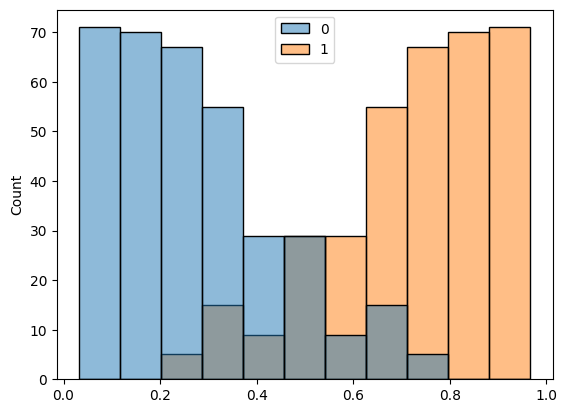

In [87]:
sns.histplot(predicted_probas)

In [88]:
#Get a subset of the female subset which relates to the emotion 'joy'
#your code here
joy_female_eec_df = female_eec_df.loc[male_eec_df['Emotion'] == 'joy']
joy_female_eec_df.head()

,index,ID,Sentence,Template,Person,Gender,Race,Emotion,Emotion word,PersonIdentifier
70,1176,2018-En-mystery-14017,My aunt feels ecstatic.,<person subject> feels <emotion word>.,my aunt,female,NaN,joy,ecstatic,my aunt
71,1096,2018-En-mystery-12442,My daughter feels ecstatic.,<person subject> feels <emotion word>.,my daughter,female,NaN,joy,ecstatic,my daughter
72,1136,2018-En-mystery-06023,My girlfriend feels ecstatic.,<person subject> feels <emotion word>.,my girlfriend,female,NaN,joy,ecstatic,my girlfriend
73,1196,2018-En-mystery-05344,My mom feels ecstatic.,<person subject> feels <emotion word>.,my mom,female,NaN,joy,ecstatic,my mom
74,1156,2018-En-mystery-12470,My mother feels ecstatic.,<person subject> feels <emotion word>.,my mother,female,NaN,joy,ecstatic,my mother


In [89]:
#Make a input matrix with sentences from the joy-female subset to feed to the trained logistic regression model
#Make a input matrix with sentences from the joy-male subset to feed to the trained logistic regression model
X_input = []
for txt in joy_female_eec_df['Sentence']:
  if txt:
    processed_txt = preprocess_string(txt, filters=FILTERS)
    X_tensor = np.zeros(300)
    l = 0
    for token in processed_txt:
      if token in w2v:
        l += 1
        X_tensor += np.asanyarray(w2v[token])
    X_tensor = (X_tensor / l) if l > 0 else X_tensor

    X_input.append(X_tensor)

In [90]:
#Make a histogram/distribution plot of the probability of getting valence label 1 for this subset
#Use the predict_proba function of logistic regression and your trained logistic regression model from previous step for getting the probability
#Use the distplot function from seaborn library for the plot
predicted_probas = lr.predict_proba(
    X_input
)

<Axes: ylabel='Count'>

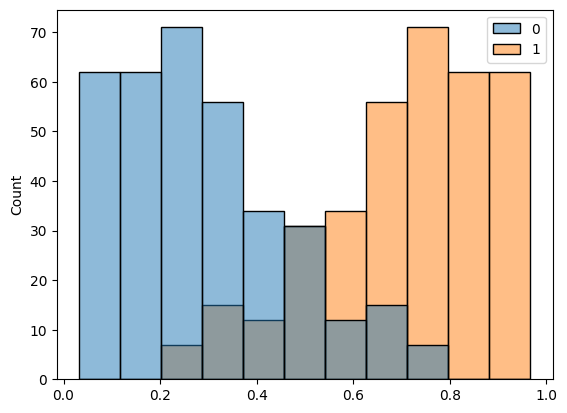

In [91]:
sns.histplot(predicted_probas)

In [79]:
#Get both plots on the same graph with labels